In [92]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [93]:
!pip install mplfinance

In [94]:
import yfinance as yf

In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mpl_dates
import seaborn as sns
%matplotlib inline
import datetime

In [96]:
df = yf.download("TSLA", start = '2018-01-01' , end = '2022-12-31')
df
#Here are the stock data of TESLA in januvary month 

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


In [97]:
df.reset_index(level=0, inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000
...,...,...,...,...,...,...,...
1254,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
1255,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
1256,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
1257,2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1259 non-null   datetime64[ns]
 1   Open       1259 non-null   float64       
 2   High       1259 non-null   float64       
 3   Low        1259 non-null   float64       
 4   Close      1259 non-null   float64       
 5   Adj Close  1259 non-null   float64       
 6   Volume     1259 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 69.0 KB


In [99]:
df = df.drop(columns=['Adj Close'])

In [100]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,65283000
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,67822500
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,149194500
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,68868000
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,147891000


In [101]:
df.describe()

,Open,High,Low,Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,131.914480,134.953362,128.540340,131.784972,1.324326e+08
std,118.024908,120.693717,114.974179,117.835854,9.017618e+07
min,12.073333,12.445333,11.799333,11.931333,2.940180e+07
25%,21.060000,21.476001,20.643000,21.078333,7.578000e+07
50%,81.431999,81.866669,79.040001,80.577332,1.016115e+08
75%,235.556671,239.885002,231.284996,236.125000,1.543911e+08
max,411.470001,414.496674,405.666656,409.970001,9.140820e+08


In [102]:
df['100ma'] = df['Close'].rolling(window = 100, min_periods = 0).mean()

In [103]:
df

,Date,Open,High,Low,Close,Volume,100ma
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,65283000,21.368668
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,67822500,21.259334
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,149194500,21.164445
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,68868000,21.149667
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,147891000,21.405200
...,...,...,...,...,...,...,...
1254,2022-12-23,126.370003,128.619995,121.019997,123.150002,166989700,234.019467
1255,2022-12-27,117.500000,119.669998,108.760002,109.099998,208643400,232.024134
1256,2022-12-28,110.349998,116.269997,108.239998,112.709999,221070500,230.269534
1257,2022-12-29,120.389999,123.570000,117.500000,121.820000,221923300,228.583501


# Visualizations

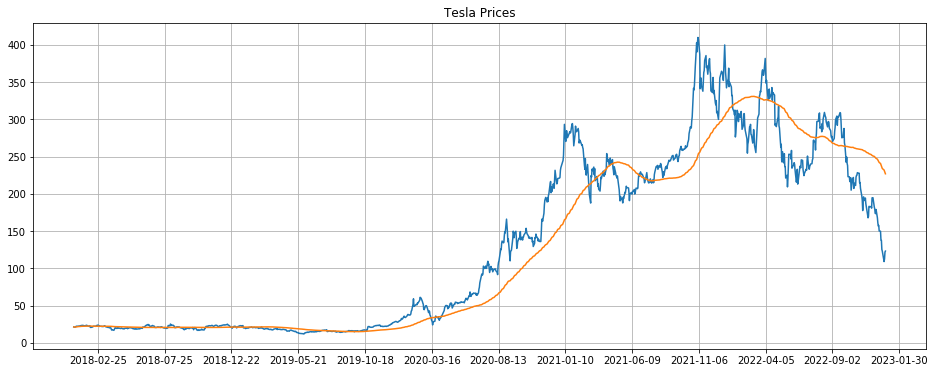

In [108]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Close)
ax.plot(df.Date, df['100ma'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Tesla Prices')
plt.grid()
plt.show()

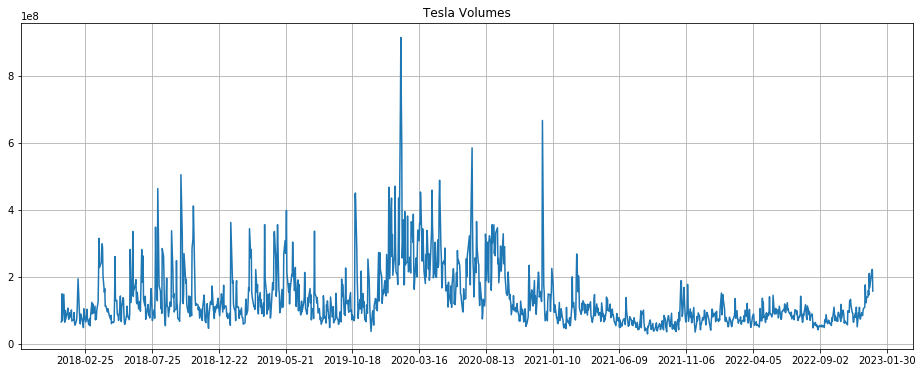

In [109]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df.Volume)
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Tesla Volumes')
plt.grid()
plt.show()

# Market Cap

In [106]:
df['Total Traded'] = df['Open']*df['Volume']

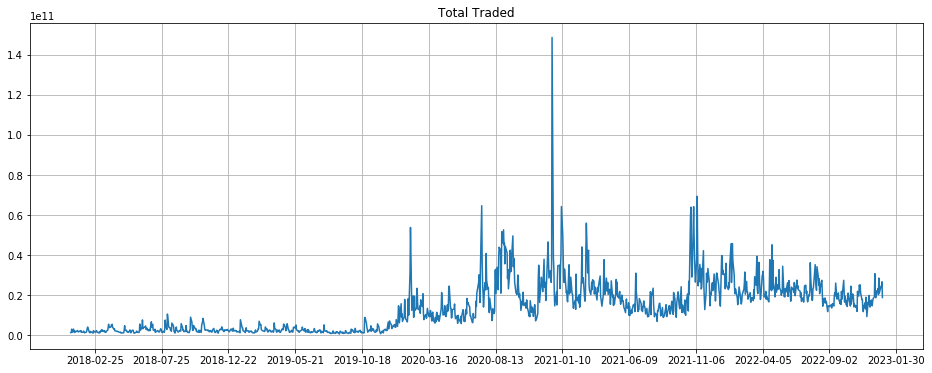

In [110]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['Total Traded'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Total Traded')
plt.grid()
plt.show()

We notice a huge spike in Tesla market cap somewhere in 2021 , And after that till now ther are no such spikes 

In [111]:
df.iloc[df['Total Traded'].argmax()]

Date            2020-12-18 00:00:00
Open                      222.96666
High                     231.666672
Low                      209.513336
Close                    231.666672
Volume                    666378600
100ma                    147.550313
Total Traded    148580210434.872437
Name: 747, dtype: object

After a quick web search we found out that around 18th December 2020, Tesla shares jump to record high ahead of S&P 500 debut to quote from the article :

Dec 18 (Reuters) - Tesla (TSLA.O) will be the most valuable company ever to join the S&P 500 (.SPX) when it makes its debut in Wall Street's most followed benchmark starting on Monday. read more

Below are some key facts about Tesla and its upcoming entry into the index:

** Index funds tracking the S&P 500 will have to buy over $80 billion worth of Tesla shares by Friday's close, while simultaneously selling other S&P 500 constituents' shares worth the same amount, according to S&P Dow Jones Indices.

** At over $600 billion, Tesla is Wall Street's sixth largest company by market capitalization. However, its weight within the S&P 500 will be slightly diminished because about a fifth of Tesla's shares are closely held by CEO Elon Musk and other insiders, and the S&P 500 is weighted based on the amount of its constituents' shares that trade on the stock market.

** Tesla's stock has surged almost 700% year to date, making it the most valuable auto company in the world, despite production that is a fraction of rivals including Toyota Motor (7203.T), Volkswagen (VOWG_p.DE) and General Motors (GM.N).

**Source : https://www.reuters.com/business/autos-transportation/wall-street-braces-teslas-sp-500-debut-2020-12-18/

# We are going to plot a candlestick plot for Tesla prices from April 2022

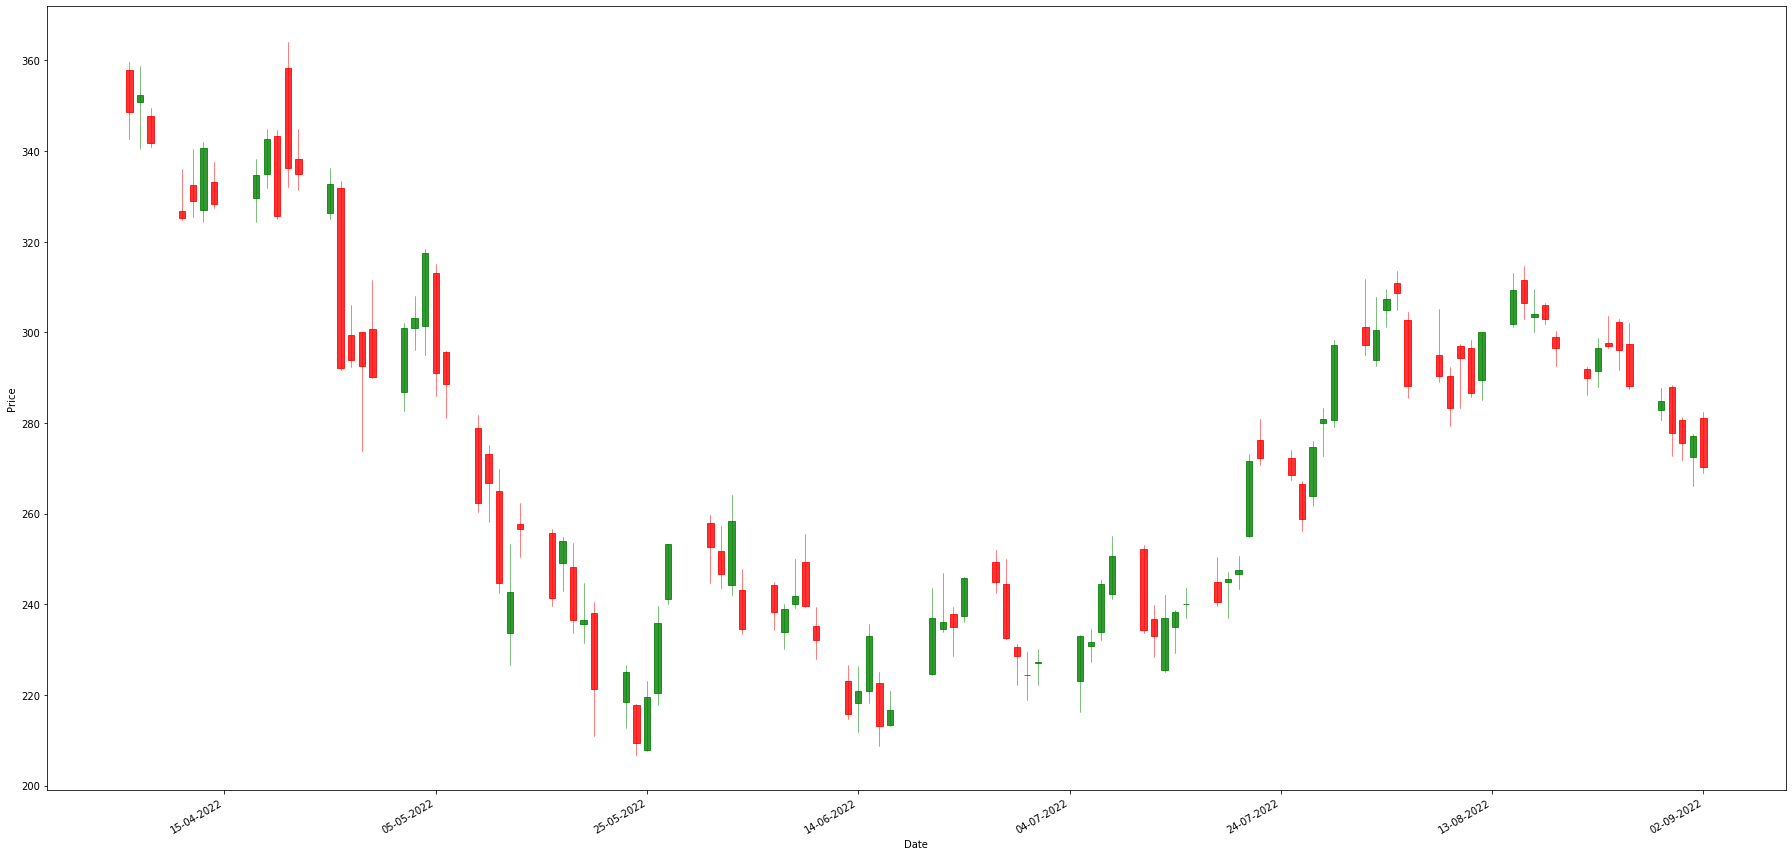

In [121]:
ohlc = df[(df['Date'] > '2022-04-05') & (df['Date'] <= '2022-09-02')]
ohlc = ohlc.loc[:, ['Date', 'Open', 'High', 'Low', 'Close']]
ohlc['Date'] = pd.to_datetime(ohlc['Date'])
ohlc['Date'] = ohlc['Date'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
fig, ax = plt.subplots(figsize = (25,12))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red', alpha=0.8)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()

fig.tight_layout()

plt.show()

# Daily Percentage Change

The simple daily percentage change in closing price (without dividends and other factors) is the percentage change in the value of a stock over a single day of trading. It is defined by the following formula:

rt=   (pt/pt−1)−1
 
It's really useful as it indicates how volatile the currency is

In [122]:
df["returns"] = (df["Close"]/df["Close"].shift(1)) - 1

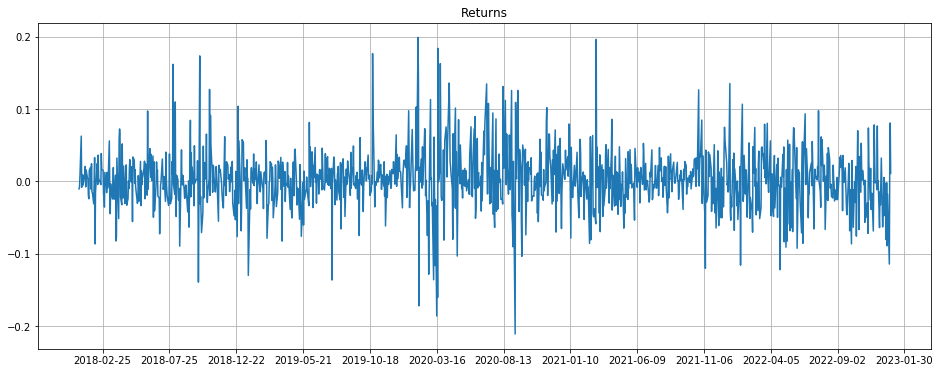

In [123]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['returns'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Returns')
plt.grid()
plt.show()

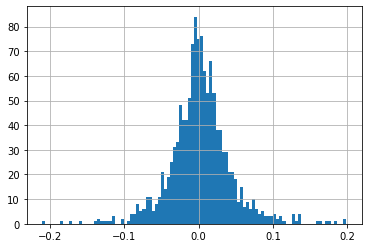

In [124]:
df["returns"].hist(bins=100)

In [125]:
df["returns"].describe()

count    1258.000000
mean        0.002243
std         0.041287
min        -0.210628
25%        -0.019226
50%         0.001535
75%         0.020863
max         0.198949
Name: returns, dtype: float64

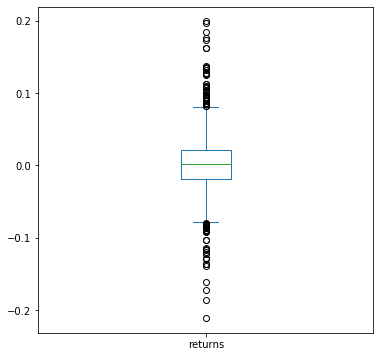

In [129]:
df["returns"].plot(kind = "box", figsize = (6,6))

# Cumulative Return

A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, independent of the amount of time involved. The cumulative return is expressed as a percentage, and it is the raw mathematical return of the following calculation:

                                         it=(1+rt)it−1

In [130]:
df["Cumulative Return"] = (1 + df["returns"]).cumprod()

In [131]:
df

,Date,Open,High,Low,Close,Volume,100ma,Total Traded,returns,Cumulative Return
0,2018-01-02,20.799999,21.474001,20.733334,21.368668,65283000,21.368668,1.357886e+09,NaN,NaN
1,2018-01-03,21.400000,21.683332,21.036667,21.150000,67822500,21.259334,1.451401e+09,-0.010233,0.989767
2,2018-01-04,20.858000,21.236668,20.378668,20.974667,149194500,21.164445,3.111899e+09,-0.008290,0.981562
3,2018-01-05,21.108000,21.149332,20.799999,21.105333,68868000,21.149667,1.453666e+09,0.006230,0.987677
4,2018-01-08,21.066668,22.468000,21.033333,22.427334,147891000,21.405200,3.115571e+09,0.062638,1.049543
...,...,...,...,...,...,...,...,...,...,...
1254,2022-12-23,126.370003,128.619995,121.019997,123.150002,166989700,234.019467,2.110249e+10,-0.017551,5.763111
1255,2022-12-27,117.500000,119.669998,108.760002,109.099998,208643400,232.024134,2.451560e+10,-0.114089,5.105606
1256,2022-12-28,110.349998,116.269997,108.239998,112.709999,221070500,230.269534,2.439513e+10,0.033089,5.274545
1257,2022-12-29,120.389999,123.570000,117.500000,121.820000,221923300,228.583501,2.671735e+10,0.080827,5.700870


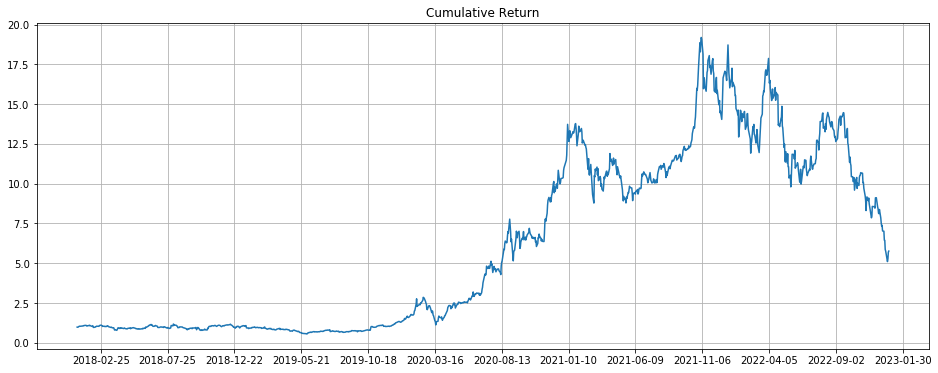

In [132]:
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(df.Date, df['Cumulative Return'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15)) # reduce number of x-labels
plt.title('Cumulative Return')
plt.grid()
plt.show()

In [133]:
df.iloc[df['Cumulative Return'].argmax()]

Date                 2021-11-04 00:00:00
Open                          411.470001
High                          414.496674
Low                           405.666656
Close                         409.970001
Volume                          76192200
100ma                         252.022101
Total Traded          31350804627.008057
returns                         0.013222
Cumulative Return              19.185567
Name: 968, dtype: object

# Conclusion :

 The price of Tesla shares traded on the Nasdaq stock exchange remained rather stable between July 2010 and January 2020. With the beginning of 2020, the price of Tesla share increased dramatically and reached its peak in November 2021, at 381.59 U.S. dollars per share. Since then, the price of Tesla share fluctuated significantly and stood at 173.22 U.S. dollars as of the end of January 2023.
 
 Tesla's stock has surged almost 700% year to date, making it the most valuable auto company in the world, despite production that is a fraction of rivals including Toyota Motor (7203.T), Volkswagen (VOWG_p.DE) and General Motors (GM.N).
 
 So 2020 was the best time to buy Tesla shares as there was drastically high spikes till end of 2020. But later on the shares went down 
 
 But I still think that Tesla still has a bright future especially after the recent developments of  Project Highland.

# Why can't we forecast future prices ?

There is far more going on in the stock market data than can be captured simply by looking at a univariate series of historical values. The stock prices are not the result of a couple of underlying causal factors, but a rather a multitude of contributions as well as a good dose of human irrationality. Indeed it has been posited that stock data is almost random.

There is a great notebook that explains why predicting stock prices is very hard : 

https://www.kaggle.com/carlmcbrideellis/lstm-time-series-stock-price-prediction-fail

as we can see in the acf and pacf plots below there isn't much correlations between current returns and past data

In [134]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters

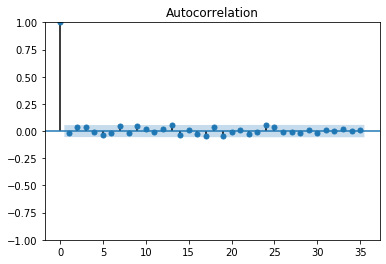

In [135]:
acf_plot = plot_acf(df.returns.dropna(), lags=35)

C:\Users\ASHISH\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


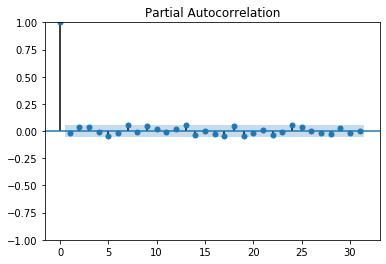

In [136]:
pacf_plot = plot_pacf(df.returns.dropna())